In [ ]:
#install kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshminde","key":"425a6c207454f201bb9ca461a0b95a84"}'}

In [ ]:
#create a kaggle folder
!mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/


In [ ]:
#permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download dhruvildave/spotify-charts

Dataset URL: https://www.kaggle.com/datasets/dhruvildave/spotify-charts
License(s): ODbL-1.0
 99% 940M/945M [00:04<00:00, 197MB/s]
100% 945M/945M [00:04<00:00, 220MB/s]


In [ ]:
!unzip spotify-charts.zip

Archive:  spotify-charts.zip
  inflating: charts.csv              


In [ ]:
# First, enable R in a Colab cell
%%capture
!apt-get install -y r-base
!Rscript -e "install.packages('ggplot2')"
!Rscript -e "install.packages('dplyr')"
!Rscript -e "install.packages('reshape2')"
!Rscript -e "install.packages('lubridate')"
!Rscript -e "install.packages('tidyr')"
!Rscript -e "install.packages('maps')"
!Rscript -e "install.packages('mapdata')"

# Now, start your R code
%%R
library(ggplot2)
library(dplyr)
library(reshape2)
library(lubridate)
library(tidyr)

# ... rest of your R code

In [ ]:
# Load the dataset
data <- read.csv("/content/charts.csv")

In [ ]:
dim(data)

[1] 26173514        9

In [ ]:
library(dplyr)

tr_data <- data %>%
  select(title, date, artist, region,trend, streams)

In [ ]:
dim(data)
head(data)
summary(data)

[1] 26173514        9

,title,rank,date,artist,url,region,chart,trend,streams
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6lroV2Kg,Argentina,top200,SAME_POSITION,253019
2,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul3ywMe46,Argentina,top200,MOVE_UP,223988
3,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAOSC1qTfo,Argentina,top200,MOVE_DOWN,210943
4,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtcMZ4S4bO,Argentina,top200,SAME_POSITION,173865
5,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37DOZPJ2hf,Argentina,top200,MOVE_UP,153956
6,Traicionera,6,2017-01-01,Sebastian Yatra,https://open.spotify.com/track/5J1c3M4EldCfNxXwrwt8mT,Argentina,top200,MOVE_DOWN,151140


    title                rank            date              artist         
 Length:26173514    Min.   :  1.00   Length:26173514    Length:26173514   
 Class :character   1st Qu.: 29.00   Class :character   Class :character  
 Mode  :character   Median : 67.00   Mode  :character   Mode  :character  
                    Mean   : 80.92                                        
                    3rd Qu.:131.00                                        
                    Max.   :200.00                                        
                                                                          
     url               region             chart              trend          
 Length:26173514    Length:26173514    Length:26173514    Length:26173514   
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
               

In [ ]:
# Check for missing values
missing_values <- colSums(is.na(data))
missing_values[missing_values > 0]

tr_data <- tr_data %>%
  filter(date >= as.Date("2019-01-01"))

dim(tr_data)

title streams 
     11 5851610

[1] 16909353        6

In [ ]:
# Check for missing values
missing_values <- colSums(is.na(tr_data))
missing_values[missing_values > 0]

title streams 
     11 3713284

In [ ]:
# Remove rows with missing streams
tr_data <- tr_data %>% filter(!is.na(streams))

tr_data$date <- as.Date(tr_data$date)

In [ ]:
# Load the lubridate package
library(lubridate)

# Create a new 'year' column from the 'date' column
tr_data <- tr_data %>%
  mutate(year = year(date))



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
# Verify the new column
head(tr_data)


,title,date,artist,region,trend,streams,year
,<chr>,<date>,<chr>,<chr>,<chr>,<int>,<dbl>
1,Ride It,2020-05-01,Regard,Bolivia,MOVE_UP,1956,2020
2,+Linda,2020-05-01,Dalex,Bolivia,MOVE_DOWN,1953,2020
3,Woah,2020-05-01,Lil Baby,Canada,MOVE_UP,35211,2020
4,25/8,2020-05-01,Bad Bunny,Chile,MOVE_DOWN,31854,2020
5,Keii,2020-05-01,Anuel AA,Colombia,MOVE_UP,16155,2020
6,Ride It,2020-05-01,Regard,Ecuador,MOVE_UP,5999,2020


In [ ]:
# Check for unique values in categorical columns
unique_values <- lapply(tr_data[c("region", "trend", "year")], unique)
unique_values

$region
 [1] "Bolivia"              "Canada"               "Chile"               
 [4] "Colombia"             "Ecuador"              "Finland"             
 [7] "France"               "Austria"              "Latvia"              
[10] "Malaysia"             "Mexico"               "New Zealand"         
[13] "Japan"                "Belgium"              "Argentina"           
[16] "Australia"            "Brazil"               "Bulgaria"            
[19] "Costa Rica"           "Czech Republic"       "Denmark"             
[22] "Dominican Republic"   "Vietnam"              "Egypt"               
[25] "El Salvador"          "Estonia"              "Germany"             
[28] "Global"               "Greece"               "Guatemala"           
[31] "Honduras"             "Hong Kong"            "Hungary"             
[34] "Iceland"              "India"                "Indonesia"           
[37] "Ireland"              "Israel"               "Italy"               
[40] "Lithuania"            "Morocco"              "Netherlands"         
[43] "Nicaragua"            "Poland"               "Romania"             
[46] "Singapore"            "Taiwan"               "Thailand"            
[49] "Norway"               "Panama"               "Paraguay"            
[52] "Peru"                 "Philippines"          "Portugal"            
[55] "United States"        "Saudi Arabia"         "Turkey"              
[58] "Uruguay"              "Spain"                "Slovakia"            
[61] "South Africa"         "Sweden"               "Switzerland"         
[64] "United Arab Emirates" "United Kingdom"       "Luxembourg"          
[67] "Russia"               "Ukraine"              "South Korea"         

$trend
[1] "MOVE_UP"       "MOVE_DOWN"     "NEW_ENTRY"     "SAME_POSITION"

$year
[1] 2020 2021 2019

In [ ]:
# Save the trimmed dataset to a CSV file
write.csv(tr_data, "/content/charts_2019-21.csv", row.names = FALSE)


In [ ]:
# ------------
# Load the dataset
data <- read.csv("/content/charts_2019-21.csv")

head(data)


,title,date,artist,region,trend,streams,year
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,Ride It,2020-05-01,Regard,Bolivia,MOVE_UP,1956,2020
2,+Linda,2020-05-01,Dalex,Bolivia,MOVE_DOWN,1953,2020
3,Woah,2020-05-01,Lil Baby,Canada,MOVE_UP,35211,2020
4,25/8,2020-05-01,Bad Bunny,Chile,MOVE_DOWN,31854,2020
5,Keii,2020-05-01,Anuel AA,Colombia,MOVE_UP,16155,2020
6,Ride It,2020-05-01,Regard,Ecuador,MOVE_UP,5999,2020


Loading required package: ggplot2



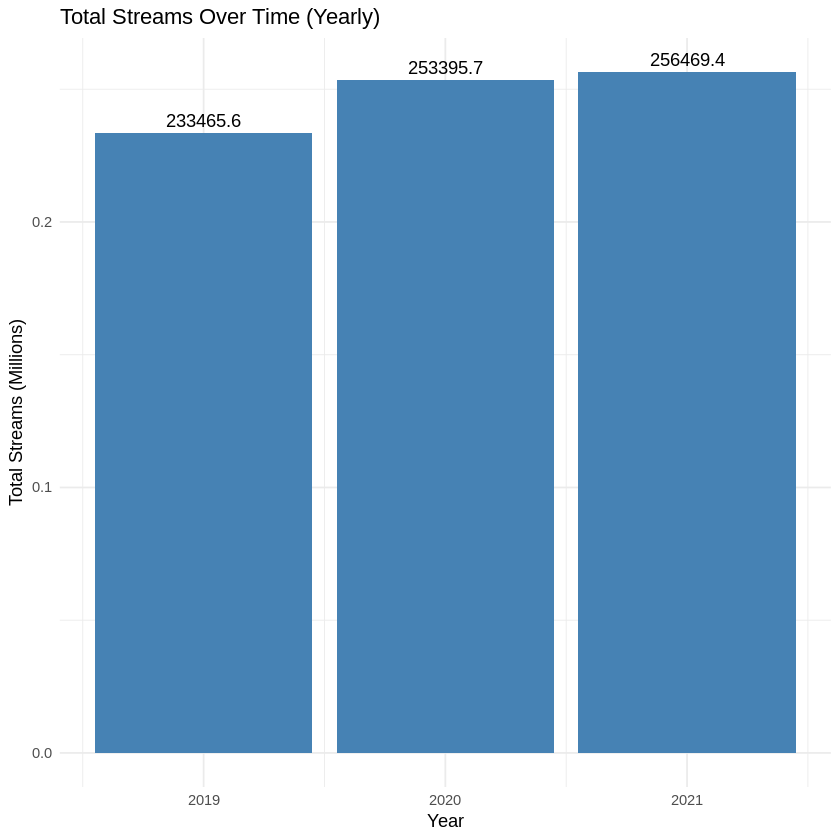

In [ ]:
# 1


# %%R # switch to R environment
# Install and load the necessary packages
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("dplyr")) install.packages("dplyr")

library(ggplot2)
library(dplyr)


# Summarize total streams by year
yearly_streams <- data %>%
  group_by(year) %>%
  summarise(total_streams = sum(streams, na.rm = TRUE))

# Convert total streams to millions for better readability
yearly_streams$total_streams_millions <- yearly_streams$total_streams / 1e6

# Plot the yearly total streams with values displayed in millions
ggplot(yearly_streams, aes(x = year, y = total_streams_millions/1e6)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = round(total_streams_millions, 1)), vjust = -0.5) + # Display totals on top
  labs(title = "Total Streams Over Time (Yearly)",
       x = "Year",
       y = "Total Streams (Millions)") +
  theme_minimal()

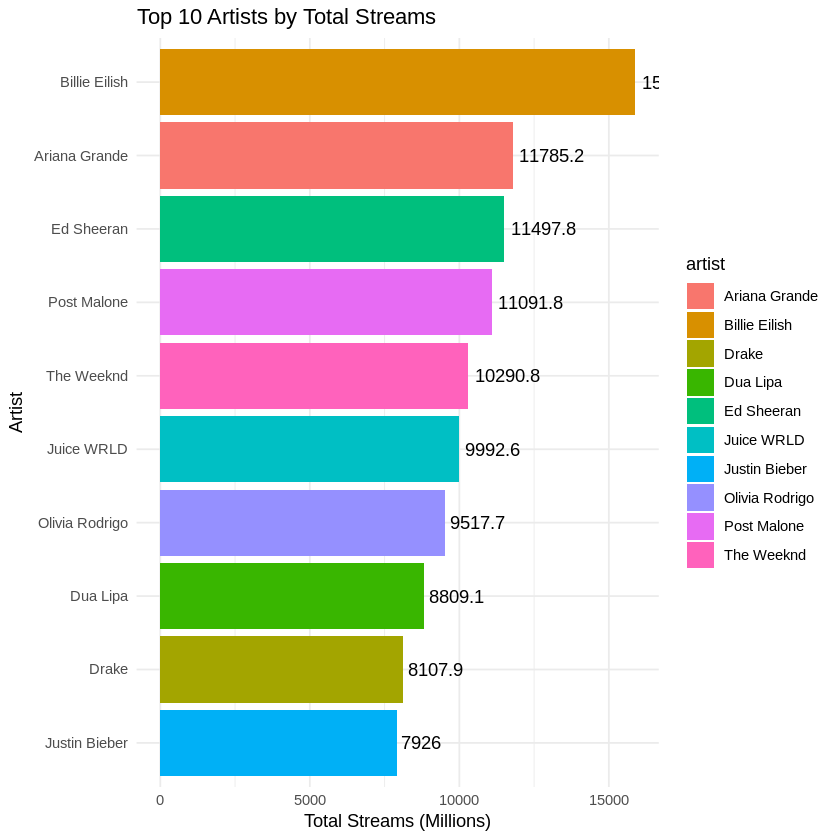

In [ ]:
# 2
# Summarize total streams by artist and find the top 10 artists
top_artists <- data %>%
  group_by(artist) %>%
  summarise(total_streams = sum(streams, na.rm = TRUE)) %>%
  arrange(desc(total_streams)) %>%
  slice_head(n = 10)

# Convert total streams to millions
top_artists$total_streams_millions <- top_artists$total_streams / 1e6

# Plot Top 10 Artists by Total Streams (in millions)
ggplot(top_artists, aes(x = reorder(artist, total_streams_millions), y = total_streams_millions, fill = artist)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  geom_text(aes(label = round(total_streams_millions, 1)), hjust = -0.1) + # Display totals next to the bars
  labs(title = "Top 10 Artists by Total Streams", x = "Artist", y = "Total Streams (Millions)") +
  theme_minimal()

[1] "Blinding Lights"                              
 [2] "Dance Monkey"                                 
 [3] "Someone You Loved"                            
 [4] "Señorita"                                     
 [5] "bad guy"                                      
 [6] "Sunflower - Spider-Man: Into the Spider-Verse"
 [7] "Don't Start Now"                              
 [8] "Circles"                                      
 [9] "Watermelon Sugar"                             
[10] "Roses - Imanbek Remix"

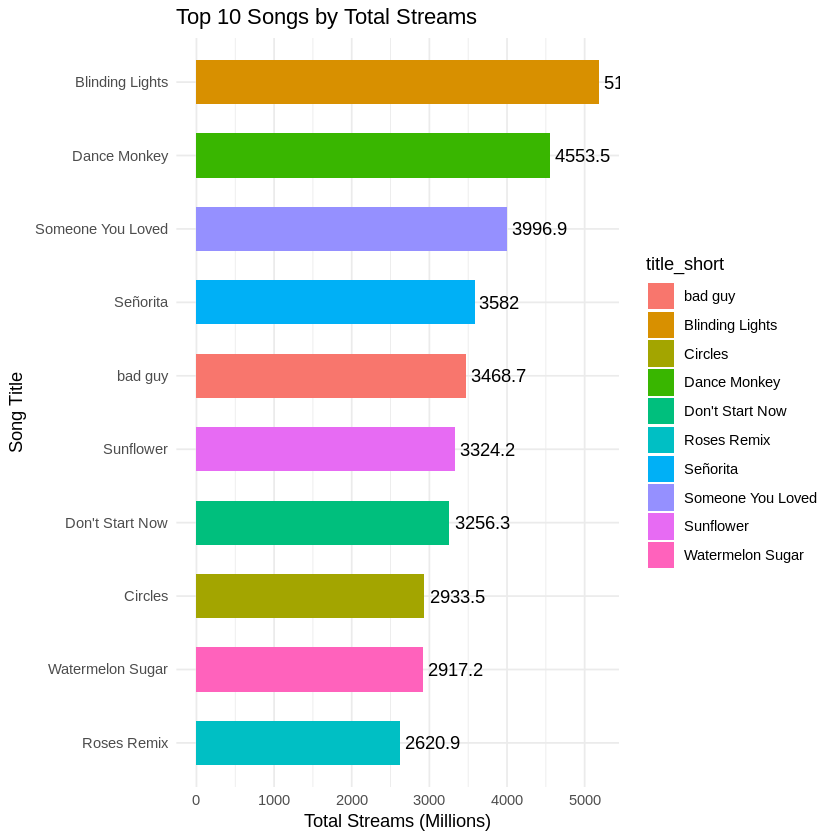

In [ ]:
# 3
# Summarize total streams by song title and find the top 10 songs
top_songs <- data %>%
  group_by(title) %>%
  summarise(total_streams = sum(streams, na.rm = TRUE)) %>%
  arrange(desc(total_streams)) %>%
  slice_head(n = 10)

top_songs$title
top_songs$title_short <- c("Blinding Lights", "Dance Monkey", "Someone You Loved", "Señorita", "bad guy",
                           "Sunflower", "Don't Start Now", "Circles", "Watermelon Sugar", "Roses Remix")


# Convert total streams to millions
top_songs$total_streams_millions <- top_songs$total_streams / 1e6

# Plot Top 10 Songs by Total Streams (in millions)
ggplot(top_songs, aes(x = reorder(title_short, total_streams_millions), y = total_streams_millions, fill = title_short)) +
  geom_bar(stat = "identity", width = 0.6) +
  coord_flip() +
  geom_text(aes(label = round(total_streams_millions, 1)), hjust = -0.1) + # Display totals next to the bars
  labs(title = "Top 10 Songs by Total Streams", x = "Song Title", y = "Total Streams (Millions)") +
  theme_minimal()


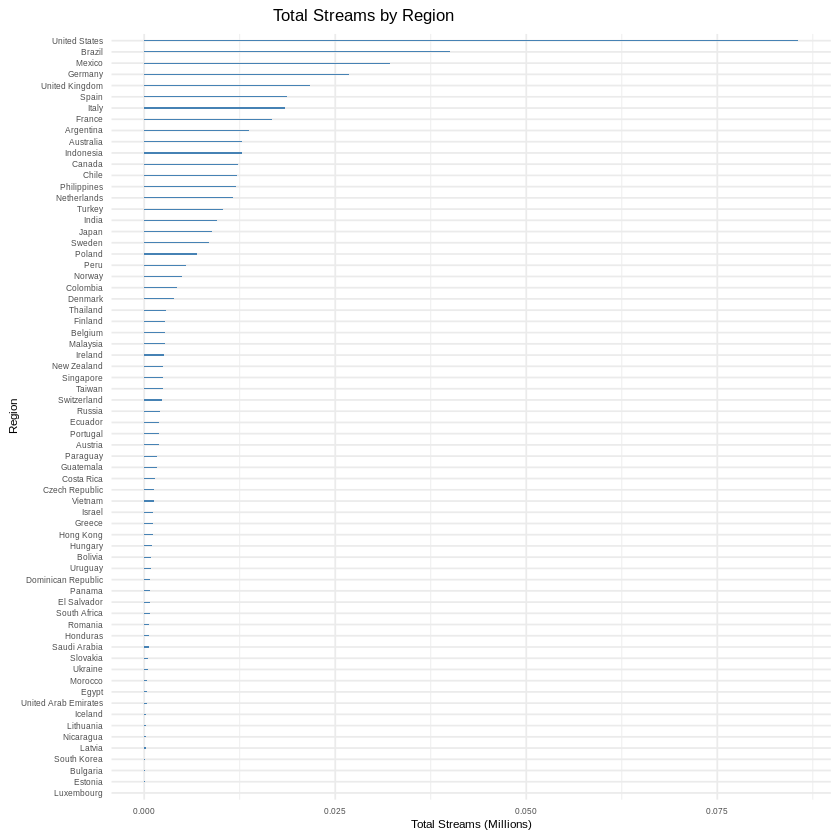

In [ ]:
# 4
# Summarize total streams by region
streams_by_region <- data %>%
  group_by(region) %>%
  summarise(total_streams = sum(streams, na.rm = TRUE))

# Remove "Global" from the dataset
streams_by_region <- streams_by_region %>%
  filter(region != "Global")

# Convert streams to millions
streams_by_region$total_streams_millions <- streams_by_region$total_streams / 1e6

# Create a custom color palette
num_regions <- length(unique(streams_by_region$region))
custom_colors <- scales::hue_pal()(num_regions)

# Bar plot for streams by region
ggplot(streams_by_region, aes(x = reorder(region, total_streams_millions), y = total_streams_millions/1e6)) +
  geom_bar(stat = "identity", fill = "steelblue", width = 0.1) +  # Use a single color
  coord_flip() +
  labs(title = "Total Streams by Region", x = "Region", y = "Total Streams (Millions)") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.3, size = 10),
    axis.text.x = element_text(size = 5),
    axis.text.y = element_text(size = 5),  # Remove y-axis text (region names)
    axis.title.x = element_text(size = 7),
    axis.title.y = element_text(size = 7)
  )

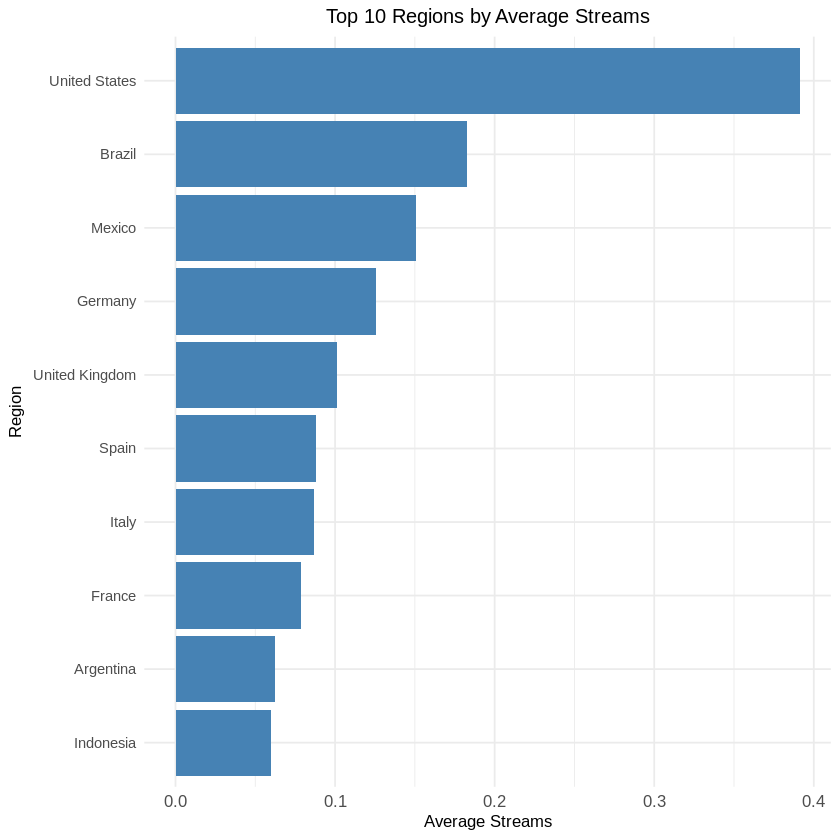

In [ ]:
# 5
# Calculate average streams by region
avg_streams_by_region <- data %>%
  group_by(region) %>%
  summarise(average_streams = mean(streams, na.rm = TRUE)) %>%
  ungroup()

# Remove "Global" from the dataset
avg_streams_by_region <- avg_streams_by_region %>%
  filter(region != "Global")

# Select top 10 regions by average streams
top_10_regions <- avg_streams_by_region %>%
  arrange(desc(average_streams)) %>%
  top_n(10, average_streams)

# Create bar plot for top 10 regions
ggplot(top_10_regions, aes(x = reorder(region, average_streams), y = average_streams/1e6)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Top 10 Regions by Average Streams", x = "Region", y = "Average Streams") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 12),
    axis.text.x = element_text(size = 10),
    axis.title.x = element_text(size = 10),
    axis.title.y = element_text(size = 10)
  )

`summarise()` has grouped output by 'artist'. You can override using the
`.groups` argument.


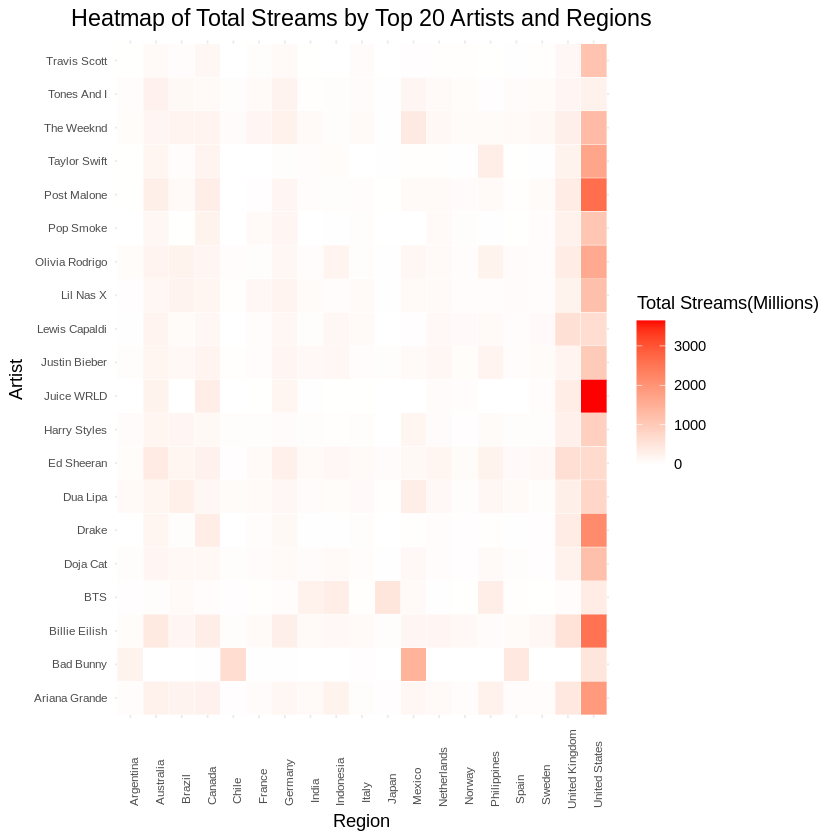

In [ ]:
# 6

# !pip install reshape2 # Install reshape2 if you haven't already
# Import the reshape2 package to use dcast
library(reshape2)


# Calculate total streams by artist and region
artist_region_streams <- data %>%
  group_by(artist, region) %>%
  summarise(total_streams = sum(streams, na.rm = TRUE)) %>%
  ungroup()

# Select top 20 artists by total streams
top_20_artists <- artist_region_streams %>%
  group_by(artist) %>%
  summarise(total_streams = sum(total_streams)) %>%
  arrange(desc(total_streams)) %>%
  slice_head(n = 20) %>%
  pull(artist)

# Filter for top 20 artists
top_artist_region_streams <- artist_region_streams %>%
  filter(artist %in% top_20_artists)

# Calculate total streams by region for filtering
region_totals <- top_artist_region_streams %>%
  group_by(region) %>%
  summarise(total_streams = sum(total_streams)) %>%
  arrange(desc(total_streams)) %>%
  slice_head(n = 20) %>%
  pull(region)

# Remove "Global" from the dataset
region_totals <- region_totals[region_totals != "Global"]

# Filter for top 20 regions
top_artist_region_streams <- top_artist_region_streams %>%
  filter(region %in% region_totals)

# Reshape data for heatmap
heatmap_data <- dcast(top_artist_region_streams, artist ~ region, value.var = "total_streams", fill = 0)

# Melt the data for ggplot
heatmap_data_melted <- melt(heatmap_data, id.vars = "artist")

# Convert total streams to millions for labels
heatmap_data_melted$value_millions <- heatmap_data_melted$value / 1e6

# Create the heatmap
heatmap_plot <- ggplot(heatmap_data_melted, aes(x = variable, y = artist, fill = value_millions)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "white", high = "red") +
  labs(title = "Heatmap of Total Streams by Top 20 Artists and Regions",
       x = "Region",
       y = "Artist",
       fill = "Total Streams(Millions)") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14),
    axis.text.x = element_text(angle = 90, hjust = 0.1, size = 7),
    axis.text.y = element_text(size = 7)
  )

# Print the heatmap
print(heatmap_plot)


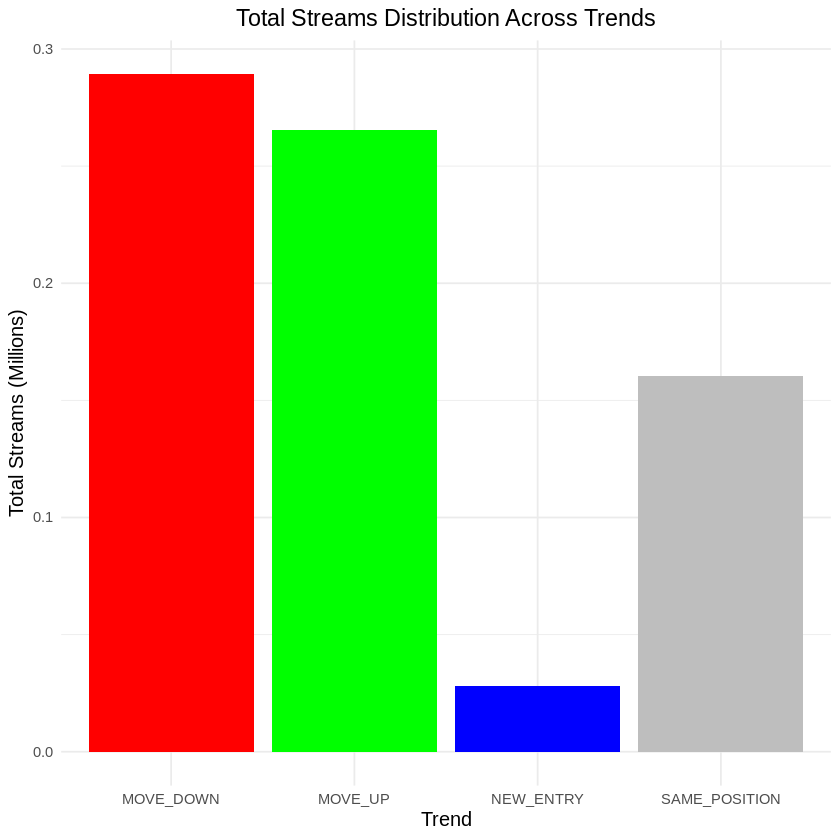

In [ ]:
# 7
# Calculate total streams by trend
trend_streams <- data %>%
  group_by(trend) %>%
  summarise(total_streams = sum(streams, na.rm = TRUE)) %>%
  ungroup()

# Convert streams to millions
trend_streams$total_streams_millions <- trend_streams$total_streams / 1e6

# Create the bar plot with appropriate trend values
bar_plot <- ggplot(trend_streams, aes(x = trend, y = total_streams_millions / 1e6, fill = trend)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("MOVE_UP" = "green", "MOVE_DOWN" = "red",
                               "NEW_ENTRY" = "blue", "SAME_POSITION" = "gray")) +  # Adjust colors for each trend
  labs(title = "Total Streams Distribution Across Trends",
       x = "Trend",
       y = "Total Streams (Millions)") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14),
    axis.title.x = element_text(size = 12),
    axis.title.y = element_text(size = 12),
    legend.position = "none"  # Remove legend if not needed
  )

# Print the bar plot
print(bar_plot)


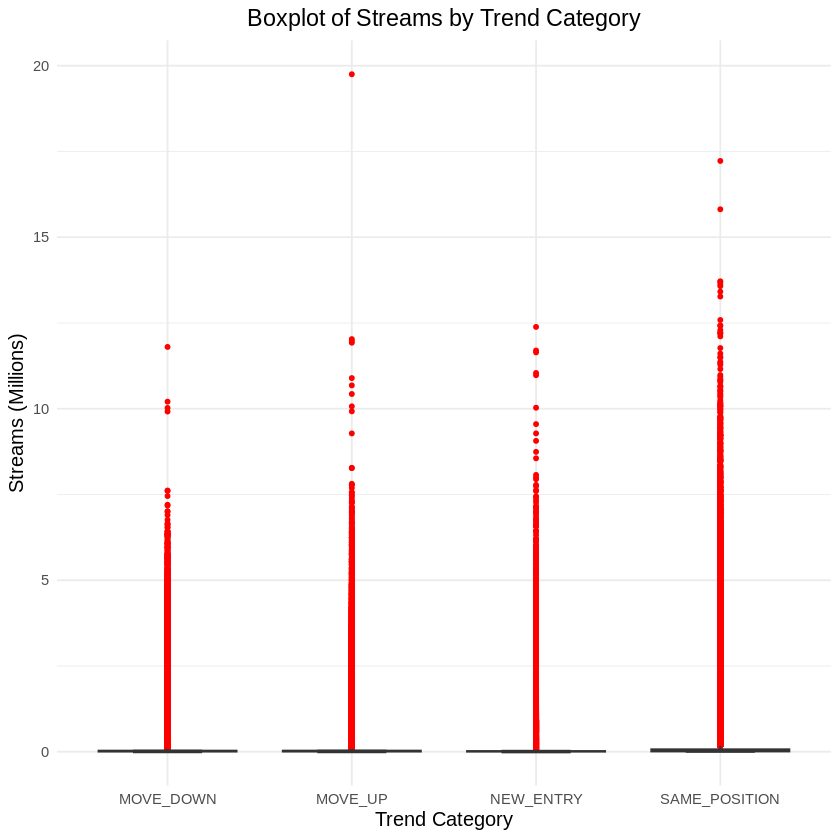

In [ ]:
#8
# Create the boxplot of streams by trend category
boxplot <- ggplot(data, aes(x = trend, y = streams / 1e6, fill = trend)) +
  geom_boxplot(outlier.colour = "red", outlier.size = 1, notch = TRUE) +  # Adding notches for median
  scale_fill_manual(values = c("MOVE_UP" = "green", "MOVE_DOWN" = "red",
                               "NEW_ENTRY" = "blue", "SAME_POSITION" = "gray")) +  # Adjust colors for each trend
  labs(title = "Boxplot of Streams by Trend Category",
       x = "Trend Category",
       y = "Streams (Millions)") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14),
    axis.title.x = element_text(size = 12),
    axis.title.y = element_text(size = 12),
    legend.position = "none"  # Remove legend if not needed
  )

# Print the boxplot
print(boxplot)

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



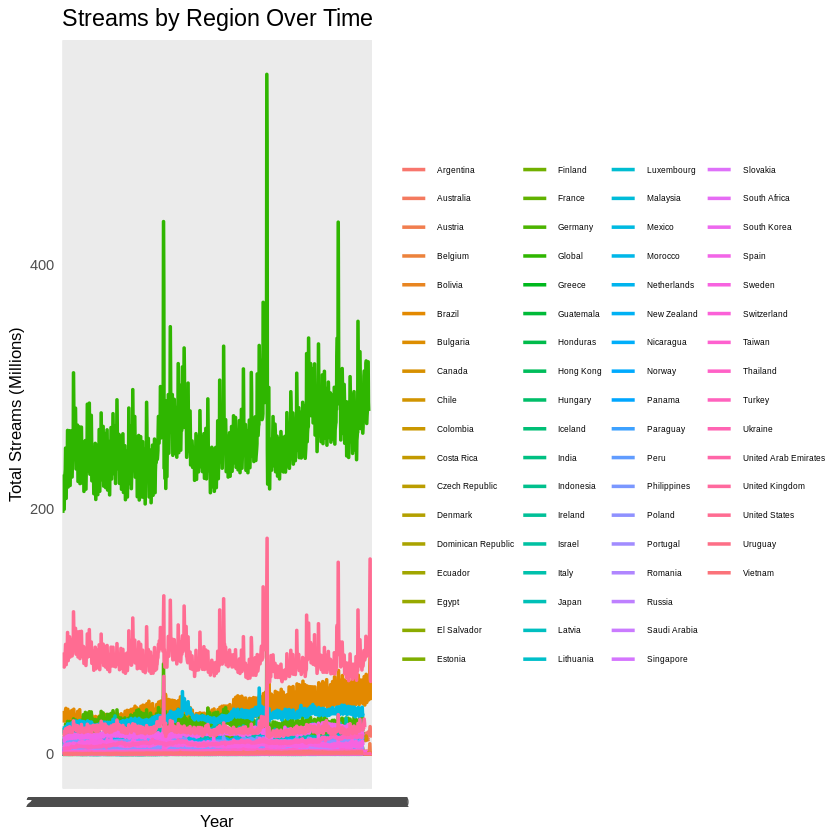

In [ ]:
# 9
# Prepare the data for line plot
streams_by_region_over_time <- data %>%
  group_by(date, region) %>%
  summarise(total_streams = sum(streams, na.rm = TRUE) / 1e6) %>%  # Convert streams to millions
  ungroup()

# Create the line plot
line_plot <- ggplot(streams_by_region_over_time, aes(x = date, y = total_streams, color = region, group = region)) +
  geom_line(linewidth = 1) +  # Draw lines
  labs(title = "Streams by Region Over Time",
       x = "Year",
       y = "Total Streams (Millions)") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14),
    axis.title.x = element_text(size = 10),
    axis.title.y = element_text(size = 10),
    legend.text = element_text(size = 5),
    legend.title = element_blank(),
    legend.position = "right"         # Adjust legend position
  )

# Print the line plot
print(line_plot)

install.packages("maps")
install.packages("mapdata")

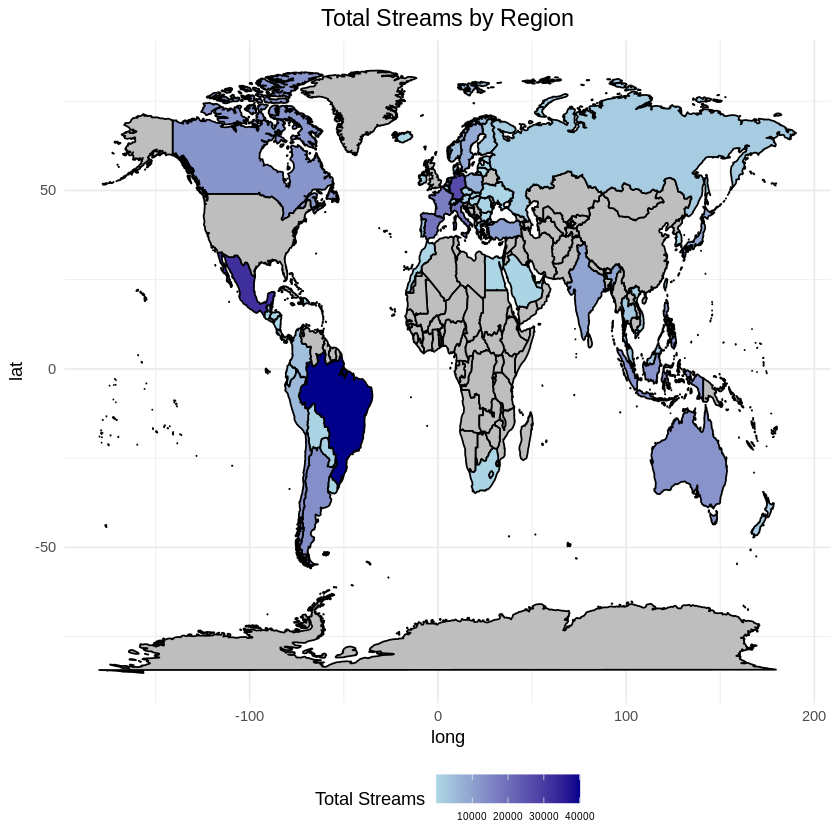

In [ ]:
# 10
library(maps)
library(mapdata)

# Create a sample dataset with region names and total streams
map_data <- data %>%
  group_by(region) %>%
  summarise(total_streams = sum(streams, na.rm = TRUE))

# Convert streams to millions
map_data$total_streams_millions <- map_data$total_streams / 1e6

# Use map_data for US or world map
world_map <- map_data("world")

# Merge the map data with your streaming data
# You might need to adjust this if your region names do not match
map_data_merged <- world_map %>%
  left_join(map_data, by = c("region" = "region"))  # Adjust the joining variable as necessary

# Create the map plot
map_plot <- ggplot() +
  geom_polygon(data = map_data_merged, aes(x = long, y = lat, group = group, fill = total_streams_millions), color = "black") +
  scale_fill_gradient(low = "lightblue", high = "darkblue", na.value = "grey") +
  labs(title = "Total Streams by Region",
       fill = "Total Streams") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14),
    legend.position = "bottom",
    legend.text = element_text(size = 6)
  )

# Print the map plot
print(map_plot)

In [ ]:

# # 11

# # # !pip install plotnine
# # # import plotnine as p9
# # install.packages("plotnine") # Install the plotnine package
# # library(plotnine)           # Load the plotnine library

# # Install and load necessary packages
# # Uncomment the line below if ggplot2 is not already installed
# # install.packages("ggplot2")
# library(ggplot2)
# library(dplyr)

# # Assuming 'data' is already loaded as a data frame
# # If not, load it like this:
# # data <- read.csv("/content/charts_2019-21.csv")


# # Scatterplot of Total Streams Over Time
# scatter_plot <- ggplot(data, aes(x = year, y = streams, color = artist)) +
#   geom_point(alpha = 0.5) +  # Use alpha for transparency
#   labs(title = "Total Streams Over Time by Artist",
#        x = "Date",
#        y = "Streams") +
#   theme_minimal() +
#   theme(
#     plot.title = element_text(hjust = 0.5, size = 14),
#     axis.title.x = element_text(size = 12),
#     axis.title.y = element_text(size = 12)
#   )

# # Print the scatter plot
# print(scatter_plot)

# ##
# # Aggregate by year and artist, summarizing total streams per year for each artist
# agg_data <- data %>%
#   group_by(year, artist) %>%
#   summarise(total_streams = sum(streams, na.rm = TRUE))

# # Create the scatter plot with aggregated data
# scatter_plot <- ggplot(agg_data, aes(x = year, y = total_streams, color = artist)) +
#   geom_point(alpha = 0.5) +  # Use alpha for transparency
#   labs(title = "Total Streams Over Time by Artist",
#        x = "Year",
#        y = "Total Streams") +
#   theme_minimal() +
#   theme(
#     plot.title = element_text(hjust = 0.5, size = 14),
#     axis.title.x = element_text(size = 12),
#     axis.title.y = element_text(size = 12)
#   )

# # Print the scatter plot
# print(scatter_plot)




`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


In [ ]:
# # 12

# # Load the necessary libraries
# # library(ggplot2)
# # library(dplyr)

# # Time Series Plot of Total Streams Over Time
# # Ensure the 'date' column is in Date format
# data$date <- as.Date(data$date)

# # Add a month-year column for aggregation
# data$month_year <- format(data$date, "%Y-%m")

# # Filter the data to include only records up to the year 2021
# filtered_data <- data %>%
#   filter(date <= as.Date("2021-08-31"))

# # Summarize total streams by month
# monthly_streams <- filtered_data %>%
#   group_by(month_year) %>%
#   summarise(total_streams = sum(streams, na.rm = TRUE))

# # Convert total streams to millions for better readability
# monthly_streams$total_streams_millions <- monthly_streams$total_streams / 1e6

# # Plot the time series with total streams in millions
# ggplot(monthly_streams, aes(x = as.Date(paste0(month_year, "-01")), y = total_streams_millions)) +
#   geom_line(color = "blue") +
#   labs(title="Total Streams Over Time (in Millions)", x="Date", y="Total Streams (Millions)") +
#   theme_minimal()



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error in data$date: object of type 'closure' is not subsettable
